# Análise Quantitativa - Teoria Moderna do Portfólio
## A Teoria
Utilizaremos a Teoria da Fronteira Eficiente de Markowitz, juntamente com o índice de Sharpe, sobre uma carteira de ações, com os dados coletados pelo _Yahoo Finance_, de modo a analisar os retornos e volatilidades de cada ativo e da carteira num geral, e as correlações presentes. Tais indicadores nos permitirão duas otimizações: obter **i)** a carteira de menor risco; e **ii)** a carteira de maior índice de Sharpe (retorno / risco).

A teoria de Markowitz possui como pilares: **i)** a possibilidade de estabelecer a carteira ideal, fornecendo ao investidor o maior retorno esperado pelo menor risco; **ii)** a distinção de riscos entre sistemático (risco inerente ao mercado como um todo, como crises e recessões) e assistemático (risco específico de uma ação, como mau gerenciamento); e **iii)** a importância da diversificação da carteira, de modo a mitigar, parcial ou até totalmente, o risco assistemático. Ou seja, tão importante quanto avaliar o retorno e o risco de um dado investimento, o investidor deve ponderar sobre a correlação entre os ativos que compõem sua carteira, visando a melhor combinação entre eles.

Assim sendo, a teoria considera diferentes distribuições de peso para cada ativo numa carteira, obtidas pseudoaleatoriamente, e para cada uma dessas distribuições calculamos o retorno médio e a variância média da carteira. Naturalmente, algumas combinações serão melhores do que as outras, onde, por melhores, nos referimos ao seu índice de Sharpe ser mais elevado. Esse índice, dado pelo retorno_médio / variância_média da carteira, nos informa sobre seu rendimento por unidade de risco e, quanto maior ele é, melhor é o desempenho da carteira.

## Fronteira Eficiente
A Fronteira Eficiente é o conjunto de carteiras otimizadas que oferecem o maior retorno esperado para um risco pré-estabelecido ou, também, o menor risco esperado para um dado retorno. Visualmente, podemos considerar um plot onde com o retorno esperado no eixo vertical e o risco esperado no eixo horizontal. Para cada carteira gerada aleatoriamente, coletaremos seu retorno e seu risco e inserir-lá-emos no plot. Conforme mais carteiras são geradas e inseridas, notaremos a formação da fronteira.

### Pra Não Dizer que Não Falei das Flores...
Todavia, nenhum gerenciador de investimentos ou analista (ninguém, na verdade) deve se basear meramente na teoria de Markowitz, pois fundamentalmente ela é incompleta (estamos falando de questões comportamentais). Não obstante, a teoria corrobora com a análise fundamentalista, não tendo a intenção de substituí-la, mas sim de servir como um ponto de partida e referência.

![title](pictures/eff.png)

In [1]:
import pandas as pd
import numpy as np
import pypfopt as pf
import functions_aux as aux
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.figure_factory as ff
import visuals
from scipy.stats import skew, kurtosis, shapiro
import joblib as jl
import warnings
warnings.filterwarnings("ignore")

## Ativos
- **Ações:**
    1. ITSA4
    2. SULA11
    3. SAPR11
    4. ALUP11
    5. NEOE3
    6. PNVL3
    7. BBSE3
    8. CPEL6
---
- **FIIs:**
    1. RBRP11
    2. VRTA11
    3. HSML11
---
- **Renda fixa:**
    1. Selic 2027
    2. IPCA+ 2030
---
- **Criptomoedas:**
    1. BTC
    2. XRP
    4. ETH
    5. ADA

## Ações

In [2]:
acoes = [
    'ITSA4', 'SULA11', 'SAPR11', 'ALUP11',
    'NEOE3', 'PNVL3', 'BBSE3', 'CPLE6'
]

start_past = '16/08/2019'
end_past = '16/12/2020'

acoes_past = aux.carteira(acoes, start_past, end_past, source='yf')

# salvando o df para uso posterior
# jl.dump(acoes_past, 'past/acoes_past.pkl')

acoes_past.head()

,ITSA4,SULA11,SAPR11,ALUP11,NEOE3,PNVL3,BBSE3,CPLE6
Date,,,,,,,,
2019-08-16,11.740143,38.719376,24.113089,24.310543,20.222248,13.010017,28.311478,3.988788
2019-08-19,11.533684,38.207096,24.255329,24.197775,20.174669,NaN,28.234823,4.085886
2019-08-20,11.355377,38.352242,24.212038,23.915861,20.108055,12.845750,28.175203,4.076564
2019-08-21,11.496145,38.335167,25.006741,24.197775,19.984343,12.845750,28.354067,4.033064
2019-08-22,11.308454,39.359718,24.975817,24.244761,19.746431,13.108250,27.766369,4.008984


In [2]:
start_past = '16/08/2019'
end_past = '16/12/2020'

acoes_past = jl.load('past/acoes_past.pkl')

### Retornos

In [3]:
# retornos diários
rets_past = aux.returns(acoes_past, 'daily')

# retornos acumulados
ret_past_acm = aux.returns(acoes_past, 'acm')

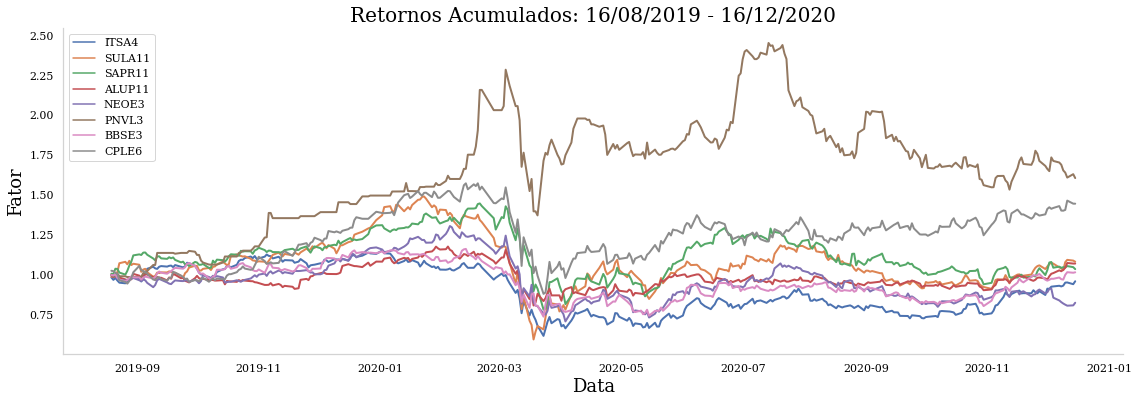

In [4]:
titles = [
    f'Retornos Acumulados: {start_past} - {end_past}',
    'Data',
    'Fator'
]

# aux.plot_lines_go([ret_past_acm], titles)
aux.plot_lines_sns(ret_past_acm, titles)

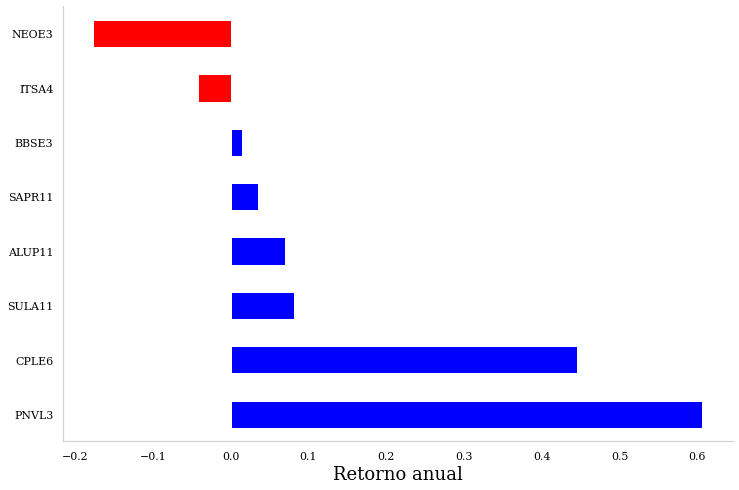

In [6]:
# retornos das ações
aux.plot_returns_sns(
    aux.returns(acoes_past, 'total'),
    start_past,
    end_past
)

## FIIs

In [3]:
start_past = '16/08/2019'
end_past = '16/12/2020'

fiis = ['RBRP11', 'VRTA11', 'HSML11']
fiis_past = aux.carteira(fiis, start_past, end_past, source='yf')

# jl.dump(fiis_past, 'past/fiis_past.pkl')

fiis_past.head()

,RBRP11,VRTA11,HSML11
Date,,,
2019-08-16,87.000000,123.389999,102.099998
2019-08-20,82.000000,124.199997,102.730003
2019-08-21,82.000000,124.199997,103.000000
2019-08-23,86.510002,124.000000,103.580002
2019-08-26,86.510002,122.010002,103.599998


In [5]:
fiis_past = jl.load('past/fiis_past.pkl')

In [6]:
# retornos diários
fiis_rets_past = aux.returns(fiis_past, 'daily')

# retornos acumulados
fiis_ret_past_acm = aux.returns(fiis_past, 'acm')

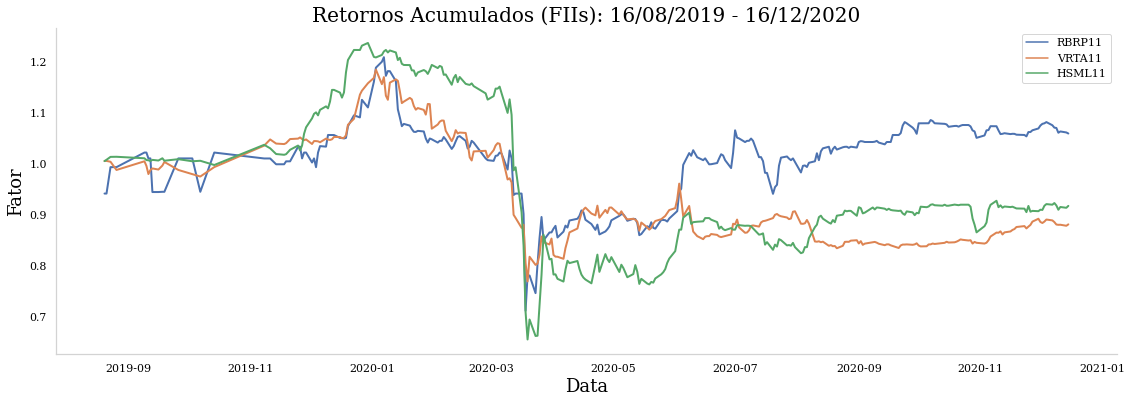

In [7]:
titles = [
    f'Retornos Acumulados (FIIs): {start_past} - {end_past}',
    'Data',
    'Fator'
]

# aux.plot_lines_go([fiis_ret_past_acm], titles)
aux.plot_lines_sns(fiis_ret_past_acm, titles)

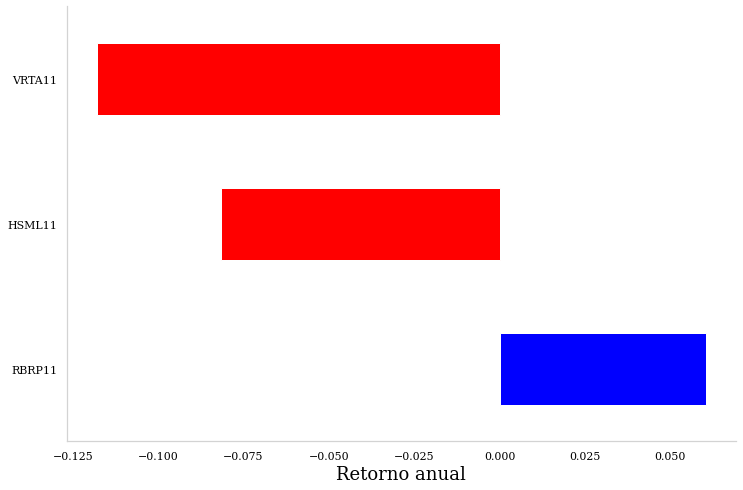

In [10]:
# retornos das ações
aux.plot_returns_sns(
    aux.returns(fiis_past, 'total'),
    start_past,
    end_past
)

## Renda Fixa

In [4]:
searchs = aux.search('tesouro', 5)
for s in searchs:
    print(s)

# ipca 2030 - 1
# selic 2027 - 4

{"id_": 1089866, "name": "Tesouro Selic LFT 0 01-Mar-2021", "symbol": "LFT030121=RRPS", "country": "brazil", "tag": "/rates-bonds/lft-0-01-mar-2021", "pair_type": "bonds", "exchange": "OTC Bonds"}
{"id_": 1089889, "name": "Tesouro IPCA + NTNB 6 15-Aug-2030", "symbol": "NTB081530=", "country": "brazil", "tag": "/rates-bonds/ntnb-6-15-aug-2030", "pair_type": "bonds", "exchange": "OTC Bonds"}
{"id_": 1172921, "name": "Tesouro Prefixado Vencimento em 01/07/2024", "symbol": "LTN070124=ANDS", "country": "brazil", "tag": "/rates-bonds/brstncltn7w3", "pair_type": "bonds", "exchange": "OTC Bonds"}
{"id_": 1172586, "name": "Tesouro Selic Vencimento em 01/03/2027", "symbol": "LFT030127=ANDS", "country": "brazil", "tag": "/rates-bonds/brstnclf1rg5", "pair_type": "bonds", "exchange": "OTC Bonds"}
{"id_": 1094220, "name": "Tesouro Prefixado LTN 0 01-Jan-2023", "symbol": "LTN010123=RRPS", "country": "brazil", "tag": "/rates-bonds/ltn-0-01-jan-2023", "pair_type": "bonds", "exchange": "OTC Bonds"}


In [6]:
# rf
titulos = {
    'IPCA2030': 1,
    'Selic2027': 4
}

rf_past = aux.rf_carteira(titulos, start_past, end_past)

# jl.dump(rf_past, 'past/rf_past.pkl')

rf_past.head()

,IPCA2030,Selic2027
Date,,
2019-08-16,4043.244,812.681
2019-08-19,4047.101,811.595
2019-08-20,4044.266,811.538
2019-08-21,4048.123,814.048
2019-08-22,4045.292,814.502


In [8]:
rf_past = jl.load('past/rf_past.pkl')

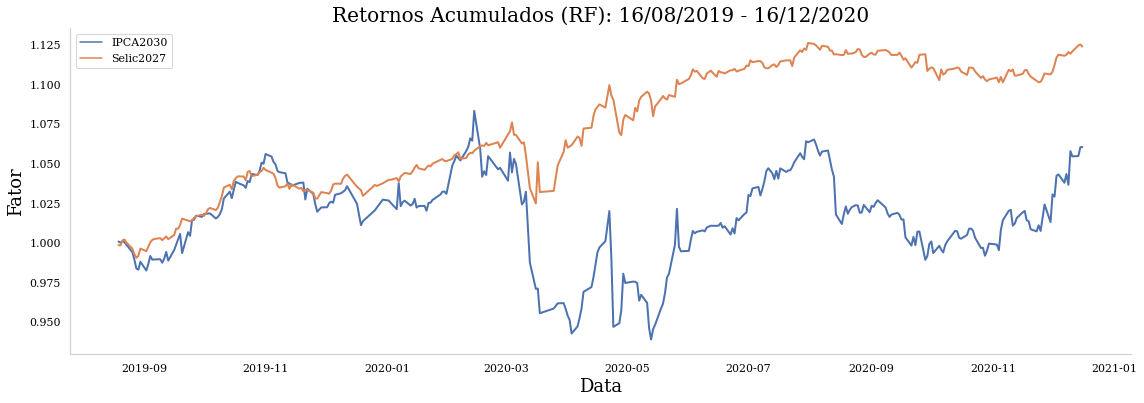

In [9]:
rf_ret_past_acm = aux.returns(rf_past, 'acm')

titles = [
    f'Retornos Acumulados (RF): {start_past} - {end_past}',
    'Data',
    'Fator'
]

# aux.plot_lines_go([rf_ret_past_acm], titles)
aux.plot_lines_sns(rf_ret_past_acm, titles)

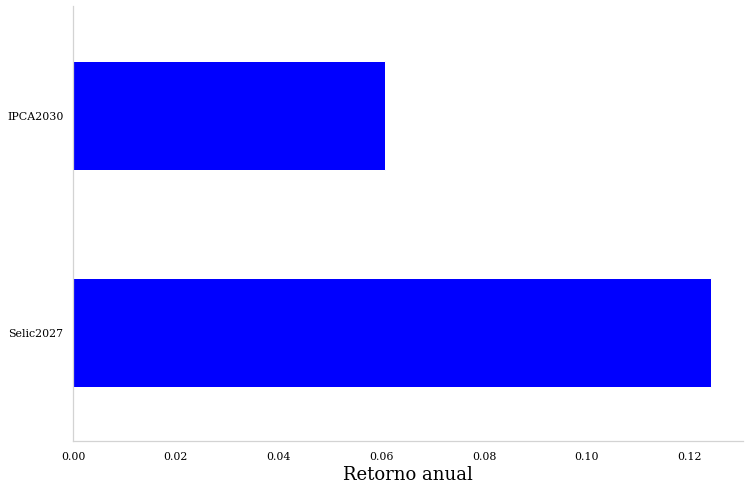

In [13]:
# retornos das ações
aux.plot_returns_sns(
    aux.returns(rf_past, 'total'),
    start_past,
    end_past,
    size=(8, 6)
)

## Análise I: Sem criptoativos
Numa análise realizada previamente, identificamos que os modelos para estimar retornos e os de risco não se comportam de forma apropriada quando o histórico de criptoativos é levado em consideração, devido à sua alta volatilidade. Portanto, as análises serão feitas separadamente, uma somente com os ativos de renda variável e renda fixa, outra somente com os criptoativos para, *a posteriori*, construirmos um portfólio com todos.

### Carteira Passado

In [88]:
start_past = '16/08/2019'
end_past = '16/12/2020'

acoes_past = jl.load('past/acoes_past.pkl')
fiis_past = jl.load('past/fiis_past.pkl')
rf_past = jl.load('past/rf_past.pkl')

carteira_past = pd.concat(
    [acoes_past, fiis_past, rf_past],
    axis=1,
    join='inner'
    # keys=['acoes', 'fiis', 'rf']
)

del acoes_past, fiis_past, rf_past

carteira_past.dropna(inplace=True)

# jl.dump(carteira_past, 'past/carteira_past.pkl')

carteira_past.head()

,ITSA4,SULA11,SAPR11,ALUP11,NEOE3,PNVL3,BBSE3,CPLE6,RBRP11,VRTA11,HSML11,IPCA2030,Selic2027
Date,,,,,,,,,,,,,
2019-08-16,11.740145,38.719368,24.113091,24.310543,20.222252,13.010017,28.311478,3.988788,87.000000,123.389999,102.099998,4043.244,812.681
2019-08-20,11.355377,38.352238,24.212038,23.915861,20.108053,12.845750,28.175203,4.076564,82.000000,124.199997,102.730003,4044.266,811.538
2019-08-21,11.496144,38.335163,25.006739,24.197775,19.984343,12.845750,28.354065,4.033064,82.000000,124.199997,103.000000,4048.123,814.048
2019-08-23,11.148916,41.494194,24.428493,23.868874,19.556107,12.878601,27.417162,3.845082,86.510002,124.000000,103.580002,4039.132,812.906
2019-08-26,11.101992,41.835705,24.119272,23.586958,19.489492,12.878601,27.153126,3.807796,86.510002,122.010002,103.599998,4019.721,809.790


In [10]:
start_past = '16/08/2019'
end_past = '16/12/2020'

carteira_past = jl.load('past/carteira_past.pkl')

In [20]:
carteira_past.describe()

,ITSA4,SULA11,SAPR11,ALUP11,NEOE3,PNVL3,BBSE3,CPLE6,RBRP11,VRTA11,HSML11,IPCA2030,Selic2027
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,10.148314,41.401585,26.979786,23.782645,19.235820,22.947026,26.463989,5.090391,87.994862,113.644466,95.913676,4100.637154,883.094261
std,1.527725,6.105058,3.361839,1.749559,2.742571,3.848950,2.958477,0.572178,6.582139,11.491593,13.344978,117.099740,28.077844
min,7.783676,22.963253,19.653460,19.602549,14.284362,12.845750,21.025738,3.807796,62.000000,99.500000,72.519997,3796.982000,809.790000
25%,8.944987,37.412952,24.424055,22.747652,17.369158,20.895731,24.283377,4.818894,86.349998,104.900002,87.980003,4039.095000,861.611000
50%,9.725154,40.085262,26.022963,23.406164,18.585363,22.805857,25.921505,5.114487,89.800003,109.169998,92.760002,4110.058000,896.963000
75%,11.252203,44.072659,29.583828,24.310543,20.364998,24.917873,28.311478,5.425838,92.309998,121.019997,102.800003,4174.620000,904.132000
max,13.364445,57.599751,34.891327,28.595663,26.392517,31.928200,32.882771,6.275113,105.279999,146.300003,126.400002,4380.827000,915.435000


#### Retornos
 - Pesos iguais: igualmente divido por setor e similarmente aos ativos/setor.

In [11]:
pesos_iguais = np.repeat(1/carteira_past.shape[1], carteira_past.shape[1])

# retornos
rets_carteira_past = (aux.returns(carteira_past) * pesos_iguais).sum(axis=1).to_frame()
rets_carteira_past.rename(columns={0: 'Retornos'}, inplace=True)

#### VaR e CVaR
- *Value at Risk* (VaR): o quanto podemos esperar de perda em um portfólio dado um período de tempo e um intervalo de confiança. Por exemplo, considere uma distribuição normal para nossos retornos, de média $\mu = 1$ e desvio padrão $\sigma = 1$ . Dado um período de tempo de um ano e um intervalo de confiança de 95%, obtemos $\text{VaR}_{95} = -0.65 \%$ , informando-nos que nossas perdas podem ser maiores que 0.65 % para além do intervalo de confiança. Este procedimento, cálculo do VaR a partir de uma distribuição normal, é conhecido como VaR paramétrico. Também temos o VaR histórico, onde analisamos diretamente a distribuição histórica dos retornos: para obtermos o $\text{VaR}_{95}$ para um período de 100 dias, coletamos os retornos dos últimos 100 dias e selecionamos o quinto menor retorno. Podemos ver, portanto, que o VaR nada mais é que um quantil sobre a probabilidade de perdas do portfólio.

- *Conditional Value at Risk* (CVaR): especifica, em média, a expectativa de perda do portfólio dado que estamos além do intervalo de confiança. No caso do $\text{VaR}_{95} = -0.65 \%$ , há 5% de chances de perdermos 0.65% do nosso capital em um ano. Se agora $\text{CVaR}_{95} = 4.5 \%$ , por exemplo, significa que nos 5% dos piores retornos, nossa média de perdas será de 4.5%.

In [12]:
vars_past = aux.value_risk(rets_carteira_past)
c_vars_past = aux.c_value_risk(rets_carteira_past, vars_past)

In [22]:
# tarefa: elaborar versão seaborn para este plot

hist_data = [
    rets_carteira_past['Retornos'].fillna(0)
]

group_labels = ['Retorno Percentual Diário']

fig = ff.create_distplot(hist_data, group_labels, bin_size=.0025)

fig.add_trace(
    go.Scatter(
        x=list(vars_past.values()),
        y=np.zeros_like(list(vars_past.values())),
        mode='markers',
        marker_color='red',
        marker_symbol='x',
        name='VaR',
        text=list(vars_past.keys()),
        hoverinfo='text+x'
    )
)


fig.update_layout(
    title=f'Carteira Passado: {start_past} - {end_past}',
    yaxis=dict(
        title='Frequência',
        showgrid=False
    ),
    xaxis=dict(
        showgrid=False,
        showspikes=True,
        spikethickness=2,
        spikedash='dot',
        spikecolor='#999999',
        spikemode='across'
    ),
    plot_bgcolor="#FFF",
    hoverdistance=100,
    spikedistance=1000
)

fig.add_annotation(
    x=-.085,
    y=42,
    text=f'CVaR 95: {round(c_vars_past["c_var_95"], 3) * 100} %',
    showarrow=False
)

fig.add_annotation(
    x=-.06,
    y=42,
    text=f'CVaR 97: {round(c_vars_past["c_var_97"], 3) * 100} %',
    showarrow=False
)

fig.add_annotation(
    x=-.085,
    y=37,
    text=f'CVaR 99: {round(c_vars_past["c_var_99"], 3) * 100} %',
    showarrow=False
)

fig.add_annotation(
    x=-.06,
    y=37,
    text=f'CVaR 99.9: {round(c_vars_past["c_var_99_9"], 2) * 100} %',
    showarrow=False
)

fig.show()

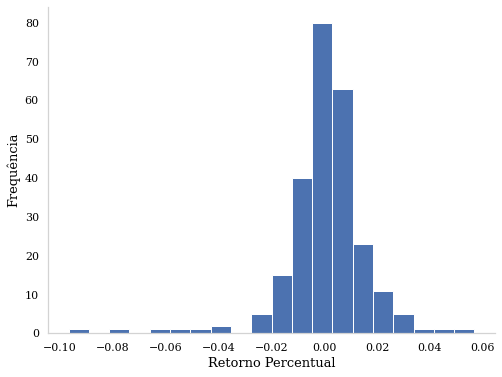

In [22]:
rets_carteira_past['Retornos'].plot(kind='hist', bins=20, figsize=(8, 6));
plt.xlabel('Retorno Percentual Diário', fontdict={'size': 13});
plt.ylabel('Frequência', fontdict={'size': 13});

#### Volatilidade, downside risk, skewness e curtose
- *Volatilidade*: relata o grau de incerteza da distribuição de retornos portfólio, isto é, o quão incerto estamos sobre os retornos futuros.
- *Downside risk*: relata o grau de incerteza da distribuição de retornos **negativos** do portfólio, isto é, o quão incerto estamos sobre as perdas futuras. Por exemplo, dados os retornos dos últimos 10 anos de um portfólio como: 0.1, 0.06, -0.12, 0.01, -0.08, -0.03, 0.08, 0.07, -0.09 e -0.07. A incerteza sobre todo o conjunto é $\sigma = 0.0769$ , enquanto o downside risk (considerando apenas os retornos negativos) é $\sigma = 0.0327$ . Podemos entender este resultado da seguinte forma. 42.52% de toda a incerteza advém de retornos negativos e, consequentemente, 57.48% de retornos positivos.
- *Skewness*: informa o grau de assimetria, positiva ou negativa, da distribuição, tendo como referência a simetria de uma distribuição normal. Uma distribuição assimétrica positiva (negativa) possui um número maior de outliers à direita (esquerda) e também é caracterizada por ter média > (<) mediana > (<) moda.
- *Curtose*: informa o quão concentrados os valores são (vulgarmente conhecido como grau de achatamento). Pode ser leptocúrtica, sendo mais centrada que a distribuição normal, ou platicúrtica, sendo menos concentrada (mais achatada). A primeira possui caudas mais alongadas que a normal e, em termos de portfólio, significa que este carrega um risco maior que aquele cujas retornos estão distribuídos de forma normal. Dado que esses conceitos referem-se à distribuição normal, que possui curtose igual a 3, distribuições leptocúrticas (platicúrticas) possuem curtose > (<) 3. É conveniente considerarmos a quantidade **excesso de curtose** como curtose $-$ 3. Desta forma, leptocúrticas (platicúrticas) possuem excesso de curtose > (<) 0.

<ins>Distribuições de retornos leptocúrticas e que apresentam skewness negativa são consideradas mais arriscadas, pois possuem uma maior probabilidade de retornos extremos e negativos.</ins>

In [13]:
cov_carteira_past = aux.returns(carteira_past).cov()

vol_carteira_past_a = aux.vol(pesos_iguais, cov_carteira_past, True)

downside_past = rets_carteira_past[rets_carteira_past['Retornos'] < 0].std()

skew_past = skew(rets_carteira_past)
curtose_past = kurtosis(rets_carteira_past) - 3

print(
    f'Volatilidade anualizada da carteira passado: {round(vol_carteira_past_a * 100, 4)} %\n'
    f'Downside risk: {round(downside_past[0], 4)}\n'
    f'Skewness: {round(skew_past[0], 4)}\n'
    f'Ex. Curtose: {round(curtose_past[0], 4)}'
)

Volatilidade anualizada da carteira passado: 24.7542 %
Downside risk: 0.0148
Skewness: -1.6025
Ex. Curtose: 6.3104


- Drawdown: expressa a magnitude da queda de um ativo/portfólio em relação à cotação máxima, assim informando a instabilidade do mesmo, de modo que um ativo/portfólio com maior (menor) drawdown indica maior (menor) instabilidade. Este indicador é muito importante ao analisarmos o tempo esperado de recuperação de um ativo/portfólio após a queda (drawdown) de seu valor. Por exemplo, dado um drawdown de 93% (caso extremo), o investidor necessita de uma alta de $1 / (1 - 0.93) \times 100 \% = 1490 \% $ para recuperar o capital. Aderindo indicadores de crescimento ao drawdown, é possível então estimar o tempo necessário para reaver o capital.

In [25]:
rol_drawdown_past = rets_carteira_past.rolling(window=30).min()

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=rol_drawdown_past.index,
        y=rol_drawdown_past['Retornos'].dropna()
    )
)

fig.update_layout(
    title=f'Drawdown Móvel (30 dias): {start_past} - {end_past}',
    yaxis=dict(
        title='Retorno %',
        showgrid=False
    ),
    xaxis=dict(
        title='Data',
        showgrid=False,
        showspikes=True,
        spikethickness=2,
        spikedash='dot',
        spikecolor='#999999',
        spikemode='across'
    ),
    plot_bgcolor="#FFF",
    hoverdistance=100,
    spikedistance=1000
)

fig.show()

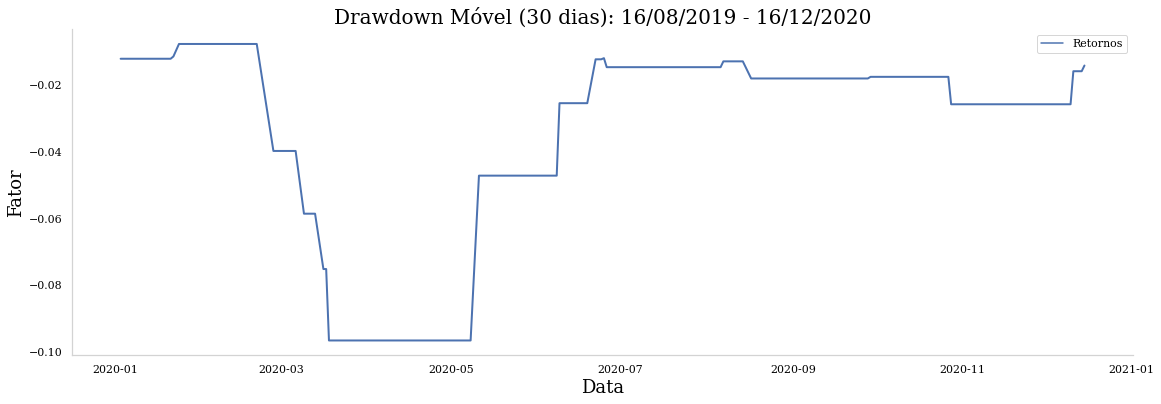

In [15]:
rol_drawdown_past = rets_carteira_past.rolling(window=30).min()

titles = [
    f'Drawdown Móvel (30 dias): {start_past} - {end_past}',
    'Data',
    'Fator'
]

aux.plot_lines_sns(rol_drawdown_past, titles)

- Normalidade: teste de Shapiro-Wilk para aceitar/rejeitar a hipótese de normalidade, com o intervalo de confiança usual de 5 %.

In [25]:
shapiro_past = shapiro(rets_carteira_past)

if shapiro_past[1] < .05:
    print('Hipótese nula rejeitada: a distribuição não é normal.')
else:
    print('Hipótese nula aceita: a distribuição é normal.')

Hipótese nula rejeitada: a distribuição não é normal.


- Benchmark passado

In [27]:
# ibovespa passado
ibvp_past = aux.search('bvsp', 1).retrieve_historical_data(
    from_date=start_past,
    to_date=end_past
)

ibvp_past.drop(ibvp_past.columns[[0, 1, 2, 4, 5]], axis=1, inplace=True)
ibvp_past.rename(columns={
    'Close': 'IBVP'
}, inplace=True)

# ibvp_past = jl.load('past/ibvp_past.pkl')

In [17]:
# retornos acumulados
ret_carteira_past_acm = (1 + rets_carteira_past).cumprod()
ibvp_past_acm = aux.returns(ibvp_past, 'acm')

benchmark_past = pd.concat(
    [ret_carteira_past_acm, ibvp_past_acm],
    axis=1,
    join='inner'
)
benchmark_past.head()

,Retornos,IBVP
Date,,
2019-08-20,0.992203,0.994149
2019-08-21,0.996230,1.013987
2019-08-23,0.994112,0.978568
2019-08-26,0.988937,0.966174
2019-09-09,1.007521,1.033816


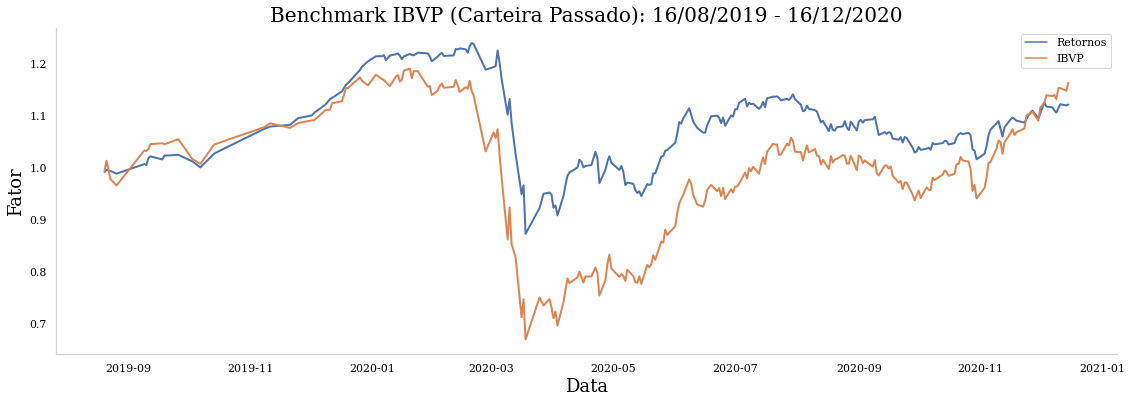

In [18]:
titles = [
    f'Benchmark IBVP (Carteira Passado): {start_past} - {end_past}',
    'Data',
    'Fator'
]

# aux.plot_lines_go([benchmark_past], titles)
aux.plot_lines_sns(benchmark_past, titles)

- $\beta$ : medida de risco sistemático (inerente ao mercado), indicando o risco adicional que o investidor assume---no caso, com o ibovespa.
    1. $\beta = 1$ :indica que a volatilidade do ativo/portfólio está altamente correlacionada com a do mercado (ibvp);
    2. $\beta < (>) \ 1$ : indica que a volatilidade do ativo/portfólio é menor (maior) que a do mercado. Considerando que seja um ativo, sua inclusão no portfólio torna-o menos (mais) volátil;
    3. $\beta < 0$ : indica que o ativo/portfólio está inversamente correlacionado ao mercado.

In [29]:
ibvp_past_ret = aux.returns(ibvp_past)
beta_past = aux.beta(rets_carteira_past, ibvp_past_ret)

print(f'Beta da carteira passado: {beta_past}')

Beta da carteira passado: -2.6192057805239107e-05


#### Correlações
- informa a influência de um ativo sobre outro, isto é, ativos altamente correlacionados são propensos a seguir a mesma tendência de variações: dado que o preço de um subiu, a tendência do outro será de subir. A tendência do outro seguir a variação do um dá-se pela intensidade de correlação entre eles. Ademais, esta ainda pode ser negativa, de modo que caso uma suba, a outra tenderá a descer. Um portfólio com ativos muito correlacionados entre si, em geral, não é favorável ao investidor, pois caso um ativo sofra uma queda muito abrupta, todos tenderão a segui-lo.

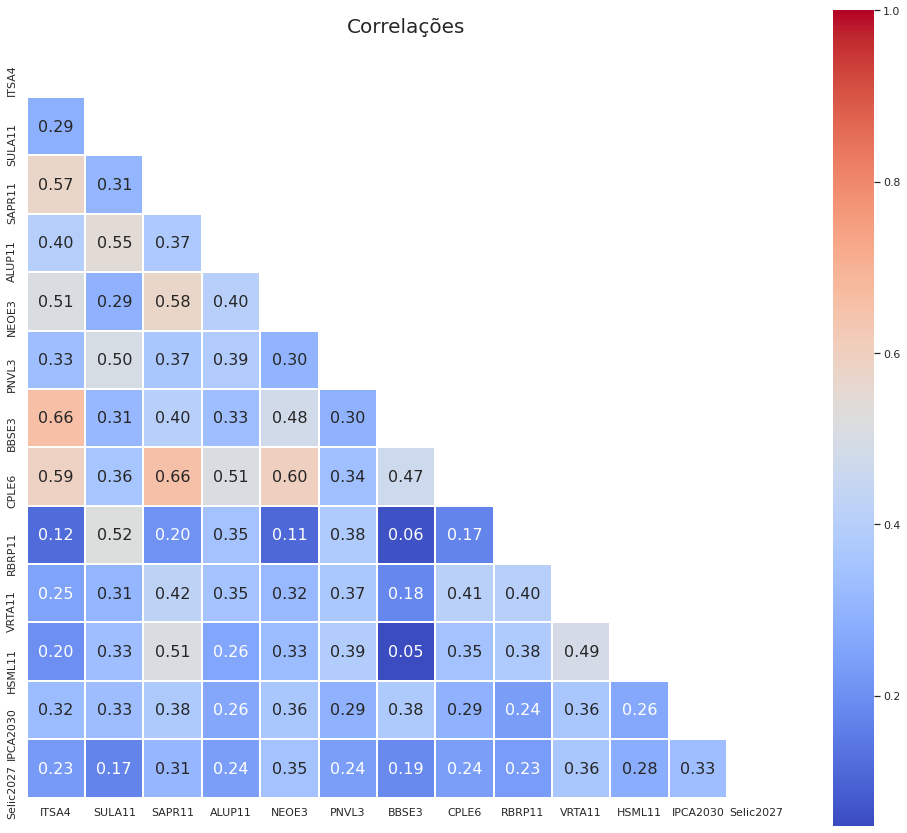

In [30]:
aux.plot_heat_sns(aux.returns(carteira_past), size=(17, 15))

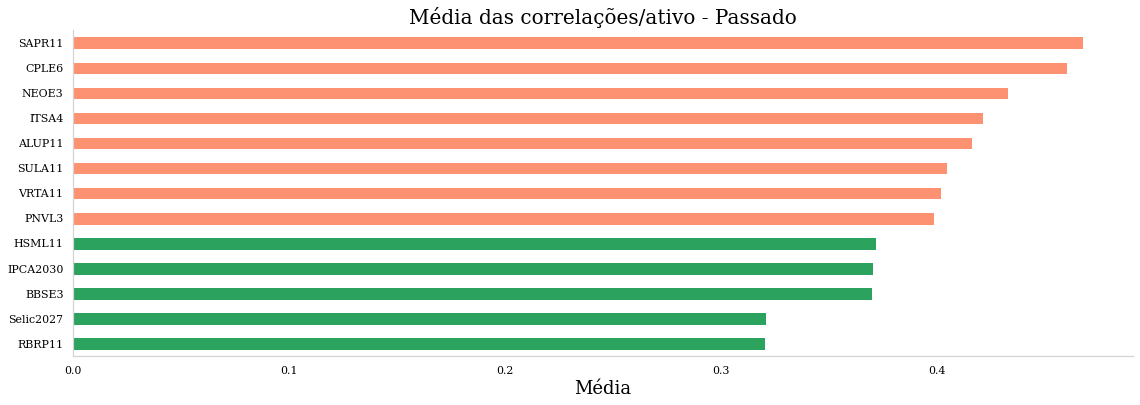

In [31]:
correlations = aux.returns(carteira_past).corr()

medias = [(col, correlations[col].mean()) for col in correlations]
medias = pd.Series(data={media[0]: media[1] for media in medias}).sort_values()

cores = [
    '#2ca25f' if m < medias.mean() else '#fc9272' for m in medias
]

medias.sort_values().plot(kind='barh',
                          title='Média das correlações/ativo - Passado',
                          color=cores,
                          figsize=(19, 6))
plt.xlabel('Média');

del correlations, medias, cores

## Carteira Futuro

In [94]:
start_fut = '17/12/2020'
end_fut = '28/10/2021'

# acoes e fiis
acoes = [
    'ITSA4', 'SULA11', 'SAPR11', 'ALUP11',
    'NEOE3', 'PNVL3', 'BBSE3', 'CPLE6'
]

fiis = ['RBRP11', 'VRTA11', 'HSML11']

acoes_fut = aux.carteira(acoes, start_fut, end_fut, source='yf')
fiis_fut = aux.carteira(fiis, start_fut, end_fut, source='yf')

# rf
titulos = {
    'IPCA2030': 1,
    'Selic2027': 4
}
rf_fut = aux.rf_carteira(titulos, start_fut, end_fut)

# juntando todos
carteira_fut = pd.concat(
    [acoes_fut, fiis_fut, rf_fut],
    axis=1,
    join='inner'
    # keys=['acoes', 'fiis', 'rf'']
)
carteira_fut.dropna(inplace=True)

# acoes_fut = jl.load('future/acoes_fut.pkl')
# fiis_fut = jl.load('future/fiis_fut.pkl')
# rf_fut = jl.load('future/rf_fut.pkl')
# carteira_fut = jl.load('future/carteira_fut.pkl')

carteira_fut.head()

,ITSA4,SULA11,SAPR11,ALUP11,NEOE3,PNVL3,BBSE3,CPLE6,RBRP11,VRTA11,HSML11,IPCA2030,Selic2027
Date,,,,,,,,,,,,,
2020-12-17,11.418541,42.029873,25.084681,26.146729,16.585442,20.726976,29.042679,5.778967,93.089996,109.709999,93.800003,4324.229,913.740
2020-12-18,11.310910,41.550762,25.553822,25.827156,16.918520,20.796465,28.409231,5.777357,93.199997,111.050003,94.000000,4261.330,913.104
2020-12-21,11.134789,41.062263,25.707010,25.662529,16.595236,20.528442,27.804575,5.765275,92.739998,111.989998,93.690002,4302.937,913.002
2020-12-22,11.154357,40.291935,25.687860,25.391376,16.624626,20.498663,27.986933,5.825683,93.000000,112.349998,94.430000,4278.076,915.107
2020-12-23,11.418541,40.470428,26.511251,25.575373,16.830351,21.044634,27.958138,6.001266,93.959999,112.809998,94.809998,4300.726,915.620


### Retornos

In [20]:
pesos_iguais = np.repeat(1/carteira_fut.shape[1], carteira_fut.shape[1])

rets_carteira_fut = (aux.returns(carteira_fut) * pesos_iguais).sum(axis=1).to_frame()
rets_carteira_fut.rename(columns={0: 'Retornos'}, inplace=True)

#### VaR e CVaR

In [21]:
vars_fut = aux.value_risk(rets_carteira_fut)
c_vars_fut = aux.c_value_risk(rets_carteira_fut, vars_fut)

In [37]:
hist_data = [
    rets_carteira_fut['Retornos'].fillna(0)
]

group_labels = ['Retorno Percentual Diário']

fig = ff.create_distplot(hist_data, group_labels, bin_size=.0025)

fig.add_trace(
    go.Scatter(
        x=list(vars_fut.values()),
        y=np.zeros_like(list(vars_fut.values())),
        mode='markers',
        marker_color='red',
        marker_symbol='x',
        name='VaR',
        text=list(vars_fut.keys()),
        hoverinfo='text+x'
    )
)


fig.update_layout(
    title=f'Carteira Passado: {start_past} - {end_past}',
    yaxis=dict(
        title='Frequência',
        showgrid=False
    ),
    xaxis=dict(
        showgrid=False,
        showspikes=True,
        spikethickness=2,
        spikedash='dot',
        spikecolor='#999999',
        spikemode='across'
    ),
    plot_bgcolor="#FFF",
    hoverdistance=100,
    spikedistance=1000
)

fig.add_annotation(
    x=-.024,
    y=42,
    text=f'CVaR 95: {round(c_vars_fut["c_var_95"], 3) * 100} %',
    showarrow=False
)

fig.add_annotation(
    x=-.018,
    y=42,
    text=f'CVaR 97: {round(c_vars_fut["c_var_97"], 3) * 100} %',
    showarrow=False
)

fig.add_annotation(
    x=-.024,
    y=37,
    text=f'CVaR 99: {round(c_vars_fut["c_var_99"], 3) * 100} %',
    showarrow=False
)

fig.add_annotation(
    x=-.018,
    y=37,
    text=f'CVaR 99.9: {round(c_vars_fut["c_var_99_9"], 2) * 100} %',
    showarrow=False
)

fig.show()

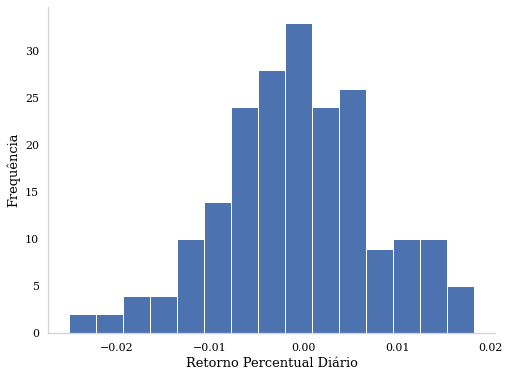

In [52]:
rets_carteira_fut['Retornos'].plot(kind='hist', bins=15, figsize=(8, 6));
plt.xlabel('Retorno Percentual Diário', fontdict={'size': 13});
plt.ylabel('Frequência', fontdict={'size': 13});

In [ ]:
# ibovespa futuro
ibvp_fut = aux.search('bvsp', 1).retrieve_historical_data(
    from_date=start_fut,
    to_date=end_fut
)

ibvp_fut.drop(ibvp_fut.columns[[0, 1, 2, 4, 5]], axis=1, inplace=True)
ibvp_fut.rename(columns={
    'Close': 'IBVP'
}, inplace=True)

# ibvp_fut = jl.load('future/ibvp_fut.pkl')

- Volatilidade, downside risk, skewness e curtose

In [23]:
cov_carteira_fut = aux.returns(carteira_fut).cov()

vol_carteira_fut_a = aux.vol(pesos_iguais, cov_carteira_fut, True)

downside_fut = rets_carteira_fut[rets_carteira_fut['Retornos'] < 0].std()

skew_fut = skew(rets_carteira_fut)
curtose_fut = kurtosis(rets_carteira_fut) - 3

print(
    f'Volatilidade anualizada da carteira passado: {round(vol_carteira_fut_a * 100, 4)} %\n'
    f'Downside risk: {round(downside_fut[0], 4)}\n'
    f'Skewness: {round(skew_fut[0], 4)}\n'
    f'Ex. Curtose: {round(curtose_fut[0], 4)}'
)

Volatilidade anualizada da carteira passado: 13.0456 %
Downside risk: 0.0054
Skewness: -0.1418
Ex. Curtose: -2.901


- Drawdown

In [44]:
rol_drawdown_fut = rets_carteira_fut.rolling(window=30).min()

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=rol_drawdown_fut.index,
        y=rol_drawdown_fut['Retornos'].dropna()
    )
)

fig.update_layout(
    title=f'Drawdown Móvel (30 dias): {start_fut} - {end_fut}',
    yaxis=dict(
        title='Retorno %',
        showgrid=False
    ),
    xaxis=dict(
        title='Data',
        showgrid=False,
        showspikes=True,
        spikethickness=2,
        spikedash='dot',
        spikecolor='#999999',
        spikemode='across'
    ),
    plot_bgcolor="#FFF",
    hoverdistance=100,
    spikedistance=1000
)

fig.show()

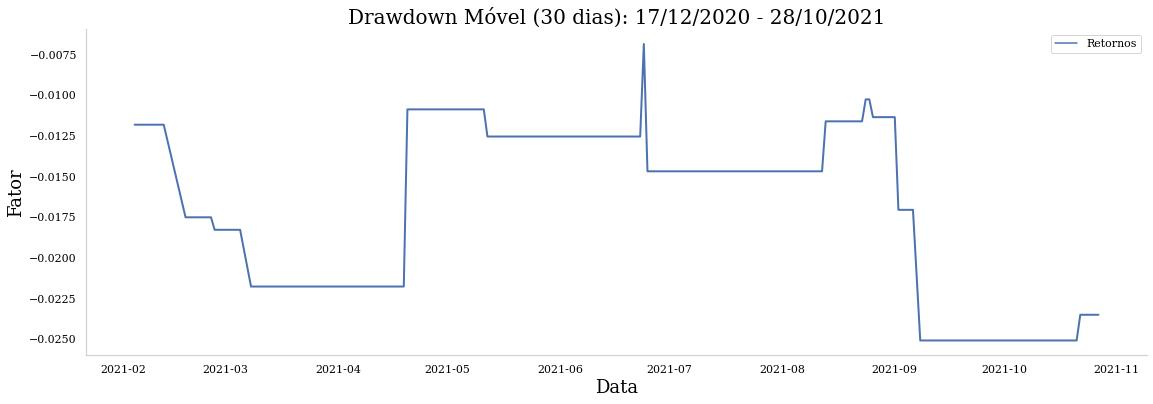

In [24]:
rol_drawdown_fut = rets_carteira_fut.rolling(window=30).min()

titles = [
    f'Drawdown Móvel (30 dias): {start_fut} - {end_fut}',
    'Data',
    'Fator'
]

aux.plot_lines_sns(rol_drawdown_fut, titles)

- Normalidade

In [45]:
shapiro_fut = shapiro(rets_carteira_fut)

if shapiro_fut[1] < .05:
    print('Hipótese nula rejeitada: a distribuição não é normal.')
else:
    print('Hipótese nula aceita: a distribuição é normal.')

Hipótese nula aceita: a distribuição é normal.


- Benchmark futuro

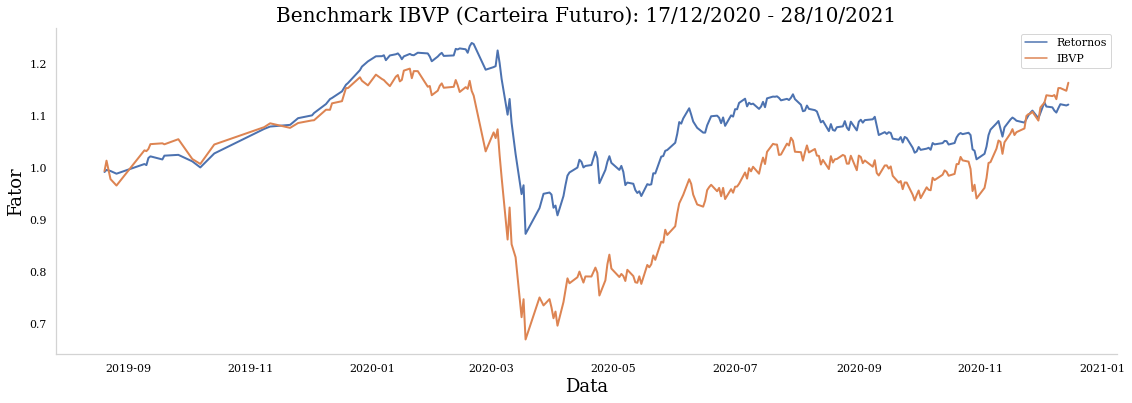

In [25]:
# retornos acumulados
ret_carteira_fut_acm = (1 + rets_carteira_fut).cumprod()
ibvp_fut_acm = aux.returns(ibvp_fut, 'acm')

benchmark_fut = pd.concat(
    [ret_carteira_fut_acm, ibvp_fut_acm],
    axis=1,
    join='inner'
)

titles = [
    f'Benchmark IBVP (Carteira Futuro): {start_fut} - {end_fut}',
    'Data',
    'Fator'
]

# aux.plot_lines_go([benchmark_fut], titles)
aux.plot_lines_sns(benchmark_past, titles)

- $\beta$

In [47]:
ibvp_fut_ret = aux.returns(ibvp_fut)
beta_fut = aux.beta(rets_carteira_fut, ibvp_fut_ret)

print(f'Beta da carteira futuro: {beta_fut}')

Beta da carteira futuro: 0.00017051659310034922


## Cenários de Otimizações
Consistem, através de um conjunto de restrições e objetivos (como mínima volatilidade, por exemplo), no cálculo dos pesos individuais dos ativos por meio de otimizações convexas da álgebra linear. Para cada combinação de pesos, teremos uma volatilidade e retorno correspondentes; a otimização busca o par risco/retorno que melhor atende as restrições e objetivos inseridos. Os portfólios otimizados definem a chamada *Fronteira Eficiente* . Para realizar as otimizações, precisamos de dois ingredientes: retornos esperados e um modelo de risco.

### Estimando Retornos

- Média Histórica

In [32]:
ret_fut_a = aux.returns(carteira_fut, 'total', 'a')

ret_past_mean = pf.expected_returns.mean_historical_return(
    prices=carteira_past,
    compounding=True
)

aux.all_metrics(y_true=ret_fut_a, y_pred=ret_past_mean)

MAE: 0.261802614080302
RSME: 0.34932606373749475


- Média Histórica Exponencial

In [33]:
ret_past_ema = pf.expected_returns.ema_historical_return(
    prices=carteira_past,
    compounding=True
)

aux.all_metrics(y_true=ret_fut_a, y_pred=ret_past_ema)

MAE: 0.3181558778539377
RSME: 0.3752959932890416


- Modelo CAPM: a ser utilizado

In [34]:
# média diária da taxa selic no período
selic_d = aux.selic(start_past, end_past, 'd')

ret_past_capm = pf.expected_returns.capm_return(
    prices=carteira_past,
    market_prices=ibvp_past,
    risk_free_rate=selic_d
)

aux.all_metrics(y_true=ret_fut_a, y_pred=ret_past_capm)

MAE: 0.22656472063404937
RSME: 0.27172925754224336


### Modelos de Risco

In [35]:
# sample covariance
samplecov_past = pf.risk_models.sample_cov(carteira_past)
samplecov_fut = pf.risk_models.sample_cov(carteira_fut)

print(
    f'M.A.E. para sample covariance: {aux.mae_cov(samplecov_past, samplecov_fut)} %'
)

# semicovariance
semicov_fut = pf.risk_models.semicovariance(
    prices=carteira_fut,
    benchmark=selic_d
)
semicov_past = pf.risk_models.semicovariance(
    prices=carteira_past,
    benchmark=selic_d
)

print(f'M.A.E. para semi covariance: {aux.mae_cov(semicov_past, semicov_fut)} %')

# exponential
expcov_fut = pf.risk_models.exp_cov(prices=carteira_fut)
expcov_past = pf.risk_models.exp_cov(prices=carteira_past)

print(
    f'M.A.E. para exponential covariance: {aux.mae_cov(expcov_past, expcov_fut)} %'
)

# ledoit-wolf
lwcov_fut = pf.risk_models.CovarianceShrinkage(carteira_fut).ledoit_wolf()
lwcov_past = pf.risk_models.CovarianceShrinkage(carteira_past).ledoit_wolf()

print(
    f'M.A.E. para Ledoit Wolf covariance: {aux.mae_cov(lwcov_past, lwcov_fut)} %'
)

M.A.E. para sample covariance: 11.14 %
M.A.E. para semi covariance: 4.7 %
M.A.E. para exponential covariance: 4.08 %
M.A.E. para Ledoit Wolf covariance: 10.73 %


### Otimizações

In [36]:
acoes = [
    'ITSA4', 'SULA11', 'SAPR11', 'ALUP11',
    'NEOE3', 'PNVL3', 'BBSE3', 'CPLE6'
]

fiis = ['RBRP11', 'VRTA11', 'HSML11']

rf = ['Selic2027', 'IPCA2030']

criptos = [
    'BTCUSDT',
    'ETHUSDT',
    'ADAUSDT',
    'XRPUSDT'
]

# dicionários para guardar os dados de cada otimização
# para comparação futura
vols = {}
rets = {}
sharpes ={}
pesos = {}

In [37]:
# restrições
sector_mapper = {
    stock: aux.find([acoes, fiis, rf], stock)
    for stock in carteira_fut.columns
}

# no mínimo 1/3 em todos os setores
sector_lower = {
    'acoes': .33,
    'fiis': .33,
    'rf': .33
}

# não mais que 55% em nenhum setor
sector_upper = {
    'acoes': .55,
    'fiis': .55,
    'rf': .55
}

#### Mínima Volatilidade

In [38]:
model = pf.EfficientFrontier(ret_past_capm, lwcov_past)
model.add_sector_constraints(
    sector_mapper,
    sector_lower,
    sector_upper
)

# no mínimo 3% por ativo
for t in carteira_fut.columns:
    stock = model.tickers.index(t)
    model.add_constraint(lambda w: w[stock] >= .03)


which = 'Min. Vol.'

model.min_volatility()

OrderedDict([('ITSA4', 0.03),
             ('SULA11', 0.03),
             ('SAPR11', 0.03),
             ('ALUP11', 0.0618936266396737),
             ('NEOE3', 0.03),
             ('PNVL3', 0.03),
             ('BBSE3', 0.0881063733603263),
             ('CPLE6', 0.03),
             ('RBRP11', 0.0439709522693414),
             ('VRTA11', 0.2380323336808706),
             ('HSML11', 0.047996714049788),
             ('IPCA2030', 0.0699150529937664),
             ('Selic2027', 0.2700849470062334)])

In [39]:
pesos_min_vol = np.array(
    list(model.clean_weights().values())
)

selic_a = aux.selic(start_past, end_past, 'a')

pesos[which] = pesos_min_vol

model.portfolio_performance(verbose=True, risk_free_rate=selic_a)

Expected annual return: 4.8%
Annual volatility: 16.5%
Sharpe Ratio: 0.18


(0.04757267514016493, 0.16506865033061685, 0.17985516651489042)

In [40]:
cov_carteira_fut = aux.returns(carteira_fut).cov()

vol_opt_min = aux.vol(pesos_min_vol, cov_carteira_fut, True)
vol_iguais = aux.vol(pesos_iguais, cov_carteira_fut, True)

ret_opt_min = ret_fut_a.dot(pesos_min_vol)
ret_iguais = ret_fut_a.dot(pesos_iguais)

selic_a = aux.selic(start_past, end_past, 'a')

vols[which] = vol_opt_min
rets[which] = ret_opt_min
sharpes[which] = aux.sharpe(ret_opt_min, vol_opt_min, selic_a)

aux.comparison(
      vol_opt=vol_opt_min,
      vol_eq=vol_iguais,
      ret_opt=ret_opt_min,
      ret_eq=ret_iguais,
      risk_free_rate=selic_a
)

Volatlidade com os pesos otimizados: 8.19 %
Volatilidade com os pesos iguais: 13.05 %
Diferença percentual: -37.2414 %

Retorno com os pesos otimizados: -9.64 %
Retorno com os pesos iguais: -14.52 %
Diferença percentual: -33.6088 %

Índice de Sharpe: -1.3954


#### Máximo Índice de Sharpe

In [41]:
model = pf.EfficientFrontier(ret_past_capm, lwcov_past)
model.add_sector_constraints(
    sector_mapper,
    sector_lower,
    sector_upper
)

# no mínimo 3% por ativo
for t in carteira_fut.columns:
    stock = model.tickers.index(t)
    model.add_constraint(lambda w: w[stock] >= .03)


which = 'Max. Sharpe'

model.max_sharpe(risk_free_rate=selic_a)

OrderedDict([('ITSA4', 0.0815027659754598),
             ('SULA11', 0.0784972340245402),
             ('SAPR11', 0.03),
             ('ALUP11', 0.03),
             ('NEOE3', 0.03),
             ('PNVL3', 0.03),
             ('BBSE3', 0.03),
             ('CPLE6', 0.03),
             ('RBRP11', 0.1718053129572241),
             ('VRTA11', 0.128194687042776),
             ('HSML11', 0.03),
             ('IPCA2030', 0.196904361918168),
             ('Selic2027', 0.133095638081832)])

In [42]:
pesos_max_sp = np.array(
    list(model.clean_weights().values())
)

pesos[which] = pesos_max_sp

model.portfolio_performance(verbose=True, risk_free_rate=selic_a)

Expected annual return: 5.9%
Annual volatility: 19.0%
Sharpe Ratio: 0.22


(0.05894872172813664, 0.1900701911553989, 0.21604911285641434)

In [43]:
vol_opt_max = aux.vol(pesos_max_sp, cov_carteira_fut, True)
ret_opt_max = ret_fut_a.dot(pesos_max_sp)

vols[which] = vol_opt_max
rets[which] = ret_opt_max
sharpes[which] = aux.sharpe(ret_opt_max, vol_opt_max, selic_a)

aux.comparison(
      vol_opt=vol_opt_max,
      vol_eq=vol_iguais,
      ret_opt=ret_opt_max,
      ret_eq=ret_iguais,
      risk_free_rate=selic_a
)

Volatlidade com os pesos otimizados: 10.63 %
Volatilidade com os pesos iguais: 13.05 %
Diferença percentual: -18.5441 %

Retorno com os pesos otimizados: -13.370000000000001 %
Retorno com os pesos iguais: -14.52 %
Diferença percentual: -7.9201 %

Índice de Sharpe: -1.426


#### Retorno e Risco Eficiente

In [44]:
model = pf.EfficientFrontier(ret_past_capm, lwcov_past)
model.add_sector_constraints(
    sector_mapper,
    sector_lower,
    sector_upper
)

# no mínimo 3% por ativo
for t in carteira_fut.columns:
    stock = model.tickers.index(t)
    model.add_constraint(lambda w: w[stock] >= .03)


# visando máximo retorno com risco de 25%
which = 'Max. Ret. Risk 25%'

model.efficient_risk(target_volatility=.25)

OrderedDict([('ITSA4', 0.0300000000025052),
             ('SULA11', 0.129999999964371),
             ('SAPR11', 0.0300000000058857),
             ('ALUP11', 0.030000000005029),
             ('NEOE3', 0.030000000005311),
             ('PNVL3', 0.030000000006183),
             ('BBSE3', 0.0300000000055956),
             ('CPLE6', 0.0300000000007148),
             ('RBRP11', 0.2699999999633254),
             ('VRTA11', 0.030000000018247),
             ('HSML11', 0.0300000000208048),
             ('IPCA2030', 0.2999999999683911),
             ('Selic2027', 0.030000000033635)])

In [45]:
pesos_max_ret_risk = np.array(
    list(model.clean_weights().values())
)

pesos[which] = pesos_max_ret_risk

model.portfolio_performance(verbose=True, risk_free_rate=selic_a)

Expected annual return: 6.5%
Annual volatility: 22.6%
Sharpe Ratio: 0.21


(0.06492769744079468, 0.22579617564057647, 0.20834485685495008)

In [46]:
vol_opt_max_ret_risk = aux.vol(pesos_max_ret_risk, cov_carteira_fut, True)
ret_opt_max_ret_risk = ret_fut_a.dot(pesos_max_ret_risk)

vols[which] = vol_opt_max_ret_risk
rets[which] = ret_opt_max_ret_risk
sharpes[which] = aux.sharpe(ret_opt_max_ret_risk, vol_opt_max_ret_risk, selic_a)

aux.comparison(
      vol_opt=vol_opt_max_ret_risk,
      vol_eq=vol_iguais,
      ret_opt=ret_opt_max_ret_risk,
      ret_eq=ret_iguais,
      risk_free_rate=selic_a
)

Volatlidade com os pesos otimizados: 13.059999999999999 %
Volatilidade com os pesos iguais: 13.05 %
Diferença percentual: 0.0766 %

Retorno com os pesos otimizados: -17.49 %
Retorno com os pesos iguais: -14.52 %
Diferença percentual: 20.4545 %

Índice de Sharpe: -1.4761


In [63]:
# averiguar o motivo do erro!!
model = pf.EfficientFrontier(ret_past_capm, lwcov_past)
model.add_sector_constraints(
    sector_mapper,
    sector_lower,
    sector_upper
)

# no mínimo 3% por ativo
for t in carteira_fut.columns:
    stock = model.tickers.index(t)
    model.add_constraint(lambda w: w[stock] >= .03)


# visando mínimo risco com retorno de 30%
which = 'Min. Risk. Ret. 30%'

model.efficient_return(target_return=.1)

ValueError: target_return must be lower than the maximum possible return

In [208]:
pesos_min_vol = np.array(
    list(model.clean_weights().values())
)

pesos[which] = pesos_min_vol

model.portfolio_performance(verbose=True, risk_free_rate=SELIC_A)

Expected annual return: 74.3%
Annual volatility: 21.1%
Sharpe Ratio: 2.91


(0.7431994734640419, 0.21060281994526908, 2.9116394245024764)

In [209]:
vol_opt_min = aux.vol(pesos_min_vol, cov_carteira_fut, True)
ret_opt_min = ret_fut_a.dot(pesos_min_vol)

vols[which] = vol_opt_min
rets[which] = ret_opt_min
sharpes[which] = aux.sharpe(ret_opt_min, vol_opt_min)

aux.comparison(
      vol_opt=vol_opt_min,
      vol_eq=vol_iguais,
      ret_opt=ret_opt_min,
      ret_eq=ret_iguais
)

Volatlidade com os pesos otimizados: 17.01933910311809 %
Volatilidade com os pesos iguais: 27.332713816530728 %
Diferença percentual: -37.732713928959186 %

Retorno com os pesos otimizados: 35.03949158055941 %
Retorno com os pesos iguais: 66.0472021792711 %
Diferença percentual: -46.94780335213572 %

Índice de Sharpe: 1.2949675335231778


#### Hierarquical Risk Parity

In [47]:
# objeto
hrp = pf.HRPOpt(returns=aux.returns(carteira_past))

which = 'HRP'

# otimização
hrp.optimize()

OrderedDict([('ALUP11', 0.019184154923525834),
             ('BBSE3', 0.009239540347093395),
             ('CPLE6', 0.005284738200304293),
             ('HSML11', 0.014465626592028248),
             ('IPCA2030', 0.13831463498730184),
             ('ITSA4', 0.010214793644910049),
             ('NEOE3', 0.006858150776130553),
             ('PNVL3', 0.008996195348077095),
             ('RBRP11', 0.01418947450186461),
             ('SAPR11', 0.005054611984774502),
             ('SULA11', 0.005787765922509392),
             ('Selic2027', 0.7130883514337851),
             ('VRTA11', 0.04932196133769506)])

In [48]:
pesos_hrp = np.array(
    list(hrp.clean_weights().values())
)

pesos[which] = pesos_hrp

hrp.portfolio_performance(verbose=True, risk_free_rate=selic_a)

Expected annual return: 10.6%
Annual volatility: 8.1%
Sharpe Ratio: 1.08


(0.10577276175083394, 0.08133877077672076, 1.0805245194020576)

In [49]:
vol_hrp = aux.vol(pesos_hrp, cov_carteira_fut, True)
ret_hrp = ret_fut_a.dot(pesos_hrp)

vols[which] = vol_hrp
rets[which] = ret_hrp
sharpes[which] = aux.sharpe(ret_hrp, vol_hrp, selic_a)

aux.comparison(
      vol_opt=vol_hrp,
      vol_eq=vol_iguais,
      ret_opt=ret_hrp,
      ret_eq=ret_iguais,
      risk_free_rate=selic_a
)

Volatlidade com os pesos otimizados: 4.34 %
Volatilidade com os pesos iguais: 13.05 %
Diferença percentual: -66.7433 %

Retorno com os pesos otimizados: -5.84 %
Retorno com os pesos iguais: -14.52 %
Diferença percentual: -59.7796 %

Índice de Sharpe: -1.7577


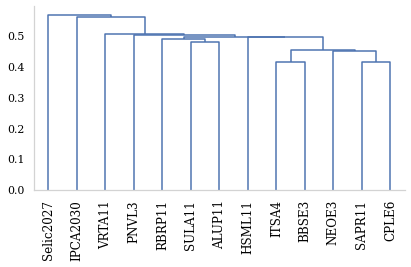

In [67]:
from pypfopt import plotting

plotting.plot_dendrogram(
    hrp=hrp,
    ax=None,
    show_tickers=True
);

### Comparação entre Otimizações

In [26]:
sharpe_iguais = aux.sharpe(ret_iguais, vol_iguais, selic_a)

ret_cores = [
    'red' if ret < ret_iguais else 'blue'
    for ret in rets.values()
]

vol_cores = [
    'blue' if vol < vol_iguais else 'red'
    for vol in vols.values()
]

sharpe_cores = [
    'red' if s < sharpe_iguais else 'blue'
    for s in sharpes.values()
]

colors = {
    'rets': ret_cores,
    'vols': vol_cores,
    'sharpes': sharpe_cores
}

# colors = jl.load('colors.pkl')

aux.plot_opt_comparisons(rets, vols, sharpes, colors)

- Benchmark: otimizações referentes à Min. Vol., Max. Sharpe, e HRP.

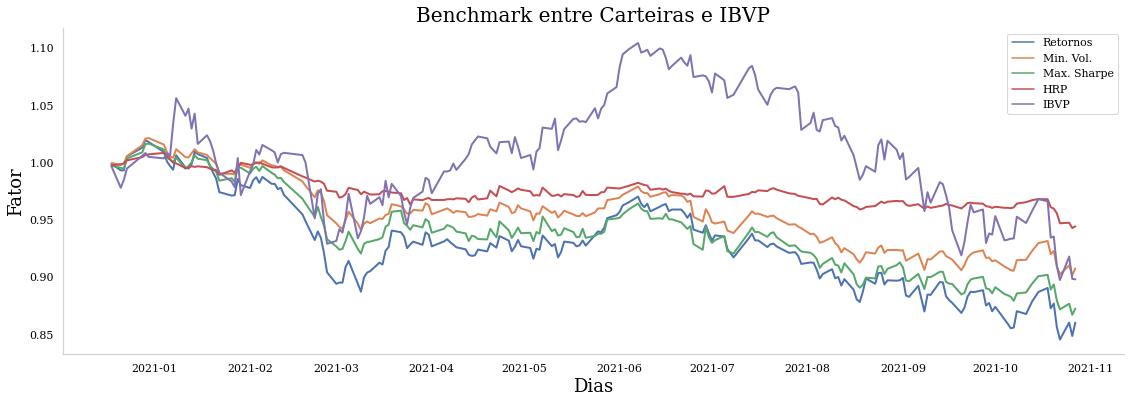

In [57]:
# para plot no seaborn

# retornos totais anuais
ret_min_vol = (aux.returns(carteira_fut) * pesos['Min. Vol.']).sum(axis=1).to_frame()
ret_min_vol.rename(columns={0: 'Min. Vol.'}, inplace=True)

ret_max_sharpe = (aux.returns(carteira_fut) * pesos['Max. Sharpe']).sum(axis=1).to_frame()
ret_max_sharpe.rename(columns={0: 'Max. Sharpe'}, inplace=True)

ret_hrp = (aux.returns(carteira_fut) * pesos['HRP']).sum(axis=1).to_frame()
ret_hrp.rename(columns={0: 'HRP'}, inplace=True)

# retornos acumulados
ret_min_vol_acm = (1 + ret_min_vol).cumprod()
ret_max_sharpe_acm = (1 + ret_max_sharpe).cumprod()
ret_hrp_acm = (1 + ret_hrp).cumprod()
titles = [
    'Benchmark entre Carteiras e IBVP',
    'Dias',
    'Fator'
]

benchmark_full = pd.concat(
    [ret_carteira_fut_acm, ret_min_vol_acm,
     ret_max_sharpe_acm, ret_hrp_acm, ibvp_fut_acm],
    axis=1,
    join='inner'
)

aux.plot_lines_sns(benchmark_full, titles)

In [ ]:
# para plot no plotly
# retornos totais anuais
ret_min_vol = (aux.returns(carteira_fut) * pesos['Min. Vol.']).sum(axis=1).to_frame()
ret_min_vol.rename(columns={0: 'Retornos'}, inplace=True)

ret_max_sharpe = (aux.returns(carteira_fut) * pesos['Max. Sharpe']).sum(axis=1).to_frame()
ret_max_sharpe.rename(columns={0: 'Retornos'}, inplace=True)

ret_hrp = (aux.returns(carteira_fut) * pesos['HRP']).sum(axis=1).to_frame()
ret_hrp.rename(columns={0: 'Retornos'}, inplace=True)

# retornos acumulados
ret_min_vol_acm = (1 + ret_min_vol).cumprod()
ret_max_sharpe_acm = (1 + ret_max_sharpe).cumprod()
ret_hrp_acm = (1 + ret_hrp).cumprod()

data = [
    go.Scatter(y=ret_carteira_fut_acm['Retornos'], name='Carteira Pesos Iguais'),
    go.Scatter(y=ret_min_vol_acm['Retornos'], name='Carteira Min. Vol.'),
    go.Scatter(y=ret_max_sharpe_acm['Retornos'], name='Carteira Max. Sharpe'),
    go.Scatter(y=ret_hrp_acm['Retornos'], name='Carteira HRP'),
    go.Scatter(y=ibvp_fut_acm['IBVP'], name='IBVP')
]

cfg_layout = go.Layout(
    title=titles[0],
    xaxis=dict(
        title=titles[1],
        showgrid=False,
        showspikes=True,
        spikethickness=2,
        spikedash='dot',
        spikecolor='#999999',
        spikemode='across'
    ),
    yaxis=dict(
        title=titles[2],
        showgrid=False
    ),
    plot_bgcolor="#FFF",
    hoverdistance=100,
    spikedistance=1000
)

fig = go.Figure(data=data, layout=cfg_layout)

fig.show()

del data, cfg_layout, fig

- Pesos

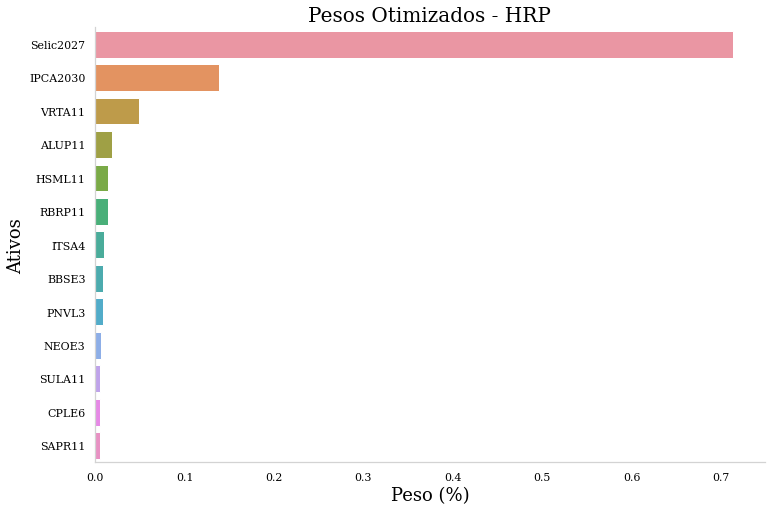

In [72]:
# plot seaborn
pesos_acoes = pd.Series(
    {par[0]: par[1] for par in zip(carteira_fut.columns, pesos['HRP'])}
).sort_values(ascending=True)

titles = [
    'Pesos Otimizados - HRP',
    'Peso (%)',
    'Ativos'
]

f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(
    x=pesos_acoes.values,
    y=pesos_acoes.index,
    order=pesos_acoes.index[::-1]
)
plt.title(titles[0])
plt.xlabel(titles[1])
plt.ylabel(titles[2]);

In [74]:
# plotly
pesos_acoes = pd.Series(
    {par[0]: par[1] for par in zip(carteira_fut.columns, pesos['HRP'])}
).sort_values(ascending=True)

titles = [
    'Pesos Otimizados',
    'Peso (%)',
    'Ativos'
]

data = [
    go.Bar(
        y=pesos_acoes.index,
        x=pesos_acoes.values * 100,
        marker={
            'line': {
                'color': '#333',
                'width': 2
            }
        },
        hoverinfo='x',
        orientation='h'
    )
]

cfg_layout = go.Layout(
    title=titles[0],
    xaxis=dict(
        title=titles[1],
        showgrid=False,
        showspikes=True,
        spikethickness=2,
        spikedash='dot',
        spikecolor='#999999',
        spikemode='across'
    ),
    yaxis=dict(
        title=titles[2],
        showgrid=False
    ),
    plot_bgcolor="#FFF",
    hoverdistance=100,
    spikedistance=1000
)

fig = go.Figure(data=data, layout=cfg_layout)

fig.update_layout(template='ggplot2')
fig.show()

del data, cfg_layout, fig

## Análise II: Criptoativos

### Passado

In [ ]:
criptos = [
    'BTCUSDT',
    'ETHUSDT',
    'ADAUSDT',
    'XRPUSDT'
]

start_past = '16/08/2019'
end_past = '16/12/2020'

criptos_past = aux.crypto_df(criptos, start_past, end_past)
# jl.dump(criptos_past, 'past/criptos_past.pkl')
criptos_past.head()

In [73]:
criptos_past = jl.load('past/criptos_past.pkl')

In [74]:
# retornos diários
ret_criptos_past = aux.returns(criptos_past)

# retornos acumulados
ret_criptos_past_acm = aux.returns(criptos_past, 'acm')

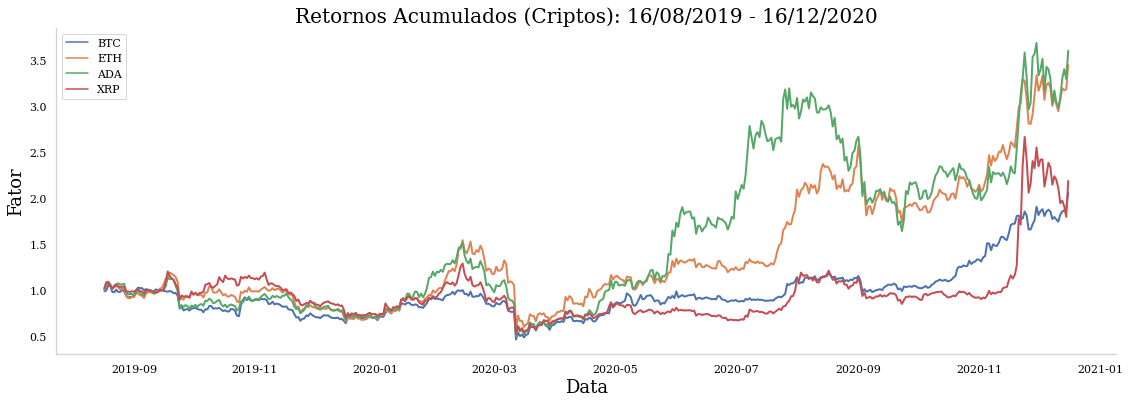

In [75]:
titles = [
    f'Retornos Acumulados (Criptos): {start_past} - {end_past}',
    'Data',
    'Fator'
]

# aux.plot_lines_go([ret_criptos_past_acm], titles)
aux.plot_lines_sns(ret_criptos_past_acm, titles)

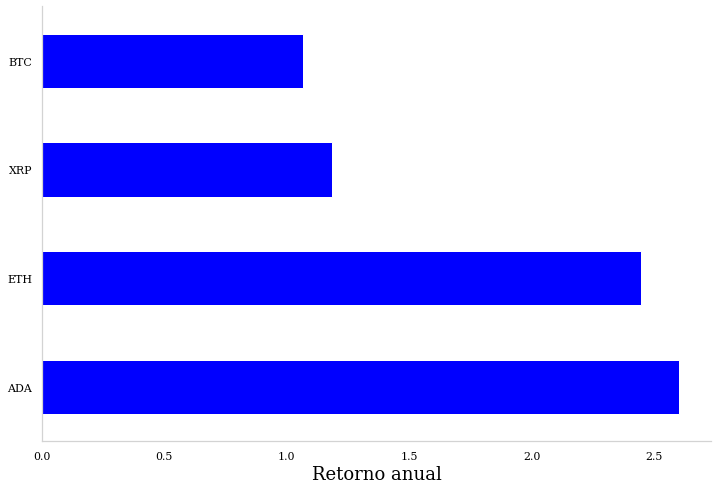

In [52]:
# retornos das ações
aux.plot_returns_sns(
    aux.returns(criptos_past, 'total'),
    start_past,
    end_past
)

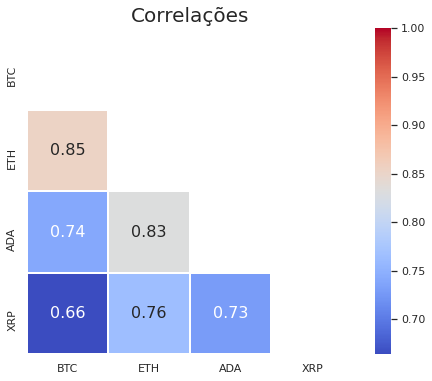

In [53]:
aux.plot_heat_sns(ret_criptos_past, size=(8, 6))

- Retornos

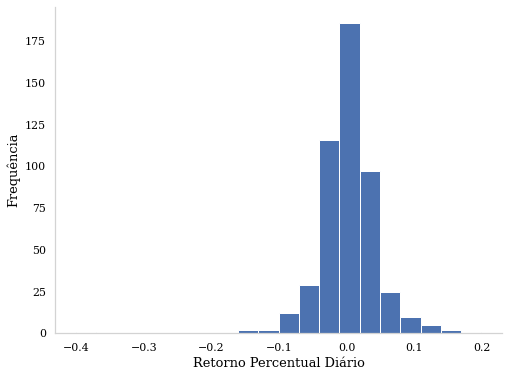

In [76]:
pesos_iguais = np.repeat(1/criptos_past.shape[1], criptos_past.shape[1])

# retornos
rets_criptos_past = (aux.returns(criptos_past) * pesos_iguais).sum(axis=1).to_frame()
rets_criptos_past.rename(columns={0: 'Retornos'}, inplace=True)

rets_criptos_past['Retornos'].plot(kind='hist', bins=20, figsize=(8, 6))
plt.xlabel('Retorno Percentual Diário', fontdict={'size': 13})
plt.ylabel('Frequência', fontdict={'size': 13});

In [79]:
vars_past = aux.value_risk(rets_criptos_past)
c_vars_past = aux.c_value_risk(rets_criptos_past, vars_past)

for i, j in zip(vars_past.keys(), c_vars_past.keys()):
    print(
        f'{i} / {j}: {vars_past[i]} / {c_vars_past[j]}'
    )

var_95 / c_var_95: -0.059372672904812074 / -0.09637826997553009
var_97 / c_var_97: -0.07337884715127661 / -0.11639607579854562
var_99 / c_var_99: -0.09275265936016713 / -0.18520691152911942
var_99_9 / c_var_99_9: -0.2820614244181449 / -0.40080807170925137


In [80]:
cov_criptos_past = aux.returns(criptos_past).cov()

vol_criptos_past_a = aux.vol(pesos_iguais, cov_criptos_past, True)

downside_past = rets_criptos_past[rets_criptos_past['Retornos'] < 0].std()

skew_past = skew(rets_criptos_past)
curtose_past = kurtosis(rets_criptos_past) - 3

print(
    f'Volatilidade anualizada da carteira passado: {round(vol_criptos_past_a * 100, 4)} %\n'
    f'Downside risk: {round(downside_past[0], 4)}\n'
    f'Skewness: {round(skew_past[0], 4)}\n'
    f'Ex. Curtose: {round(curtose_past[0], 4)}'
)

Volatilidade anualizada da carteira passado: 68.1886 %
Downside risk: 0.0359
Skewness: -1.4283
Ex. Curtose: 14.2462


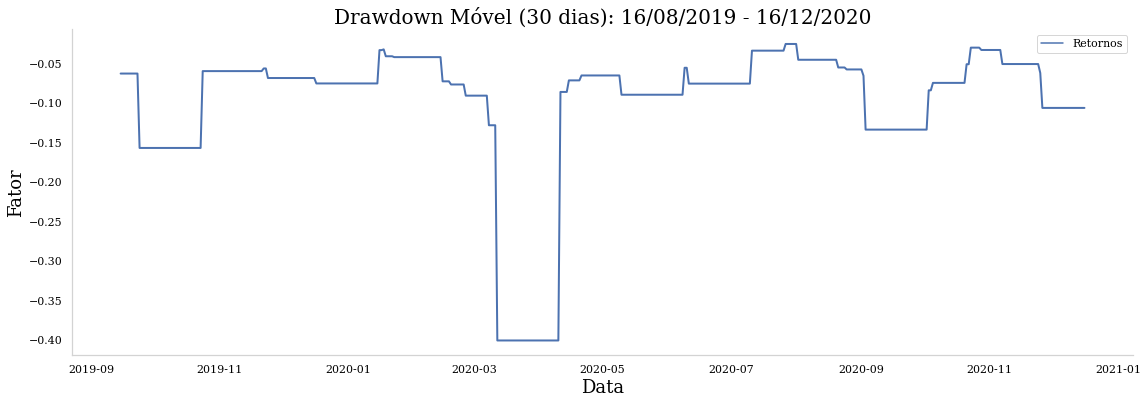

In [81]:
rol_drawdown_past = rets_criptos_past.rolling(window=30).min()

titles = [
    f'Drawdown Móvel (30 dias): {start_past} - {end_past}',
    'Data',
    'Fator'
]

aux.plot_lines_sns(rol_drawdown_past, titles)

In [64]:
shapiro_past = shapiro(rets_criptos_past)

if shapiro_past[1] < .05:
    print('Hipótese nula rejeitada: a distribuição não é normal.')
else:
    print('Hipótese nula aceita: a distribuição é normal.')

Hipótese nula rejeitada: a distribuição não é normal.


### Futuro

In [83]:
start_fut = '17/12/2020'
end_fut = '28/10/2021'

# criptos_fut = aux.crypto_df(criptos, start_fut, end_fut)

criptos_fut = jl.load('future/criptos_fut.pkl')

In [84]:
# retornos diários
ret_criptos_fut = aux.returns(criptos_fut)

# retornos acumulados
ret_criptos_fut_acm = aux.returns(criptos_fut, 'acm')

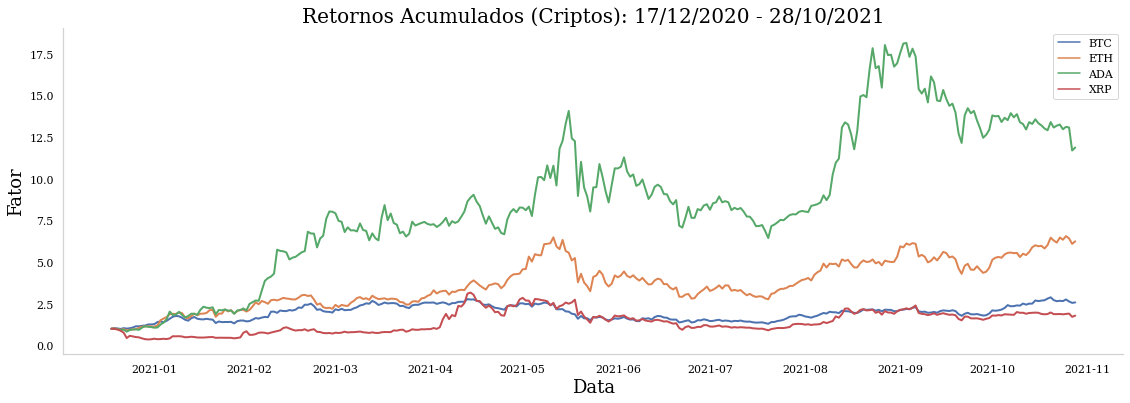

In [86]:
titles = [
    f'Retornos Acumulados (Criptos): {start_fut} - {end_fut}',
    'Data',
    'Fator'
]

# aux.plot_lines_go([ret_criptos_fut_acm], titles)
aux.plot_lines_sns(ret_criptos_fut_acm, titles)

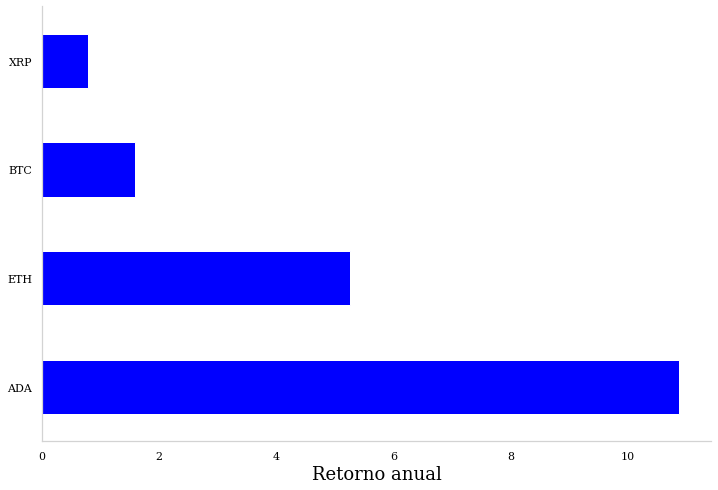

In [58]:
# retornos das ações
aux.plot_returns_sns(
    aux.returns(criptos_fut, 'total'),
    start_fut,
    end_fut
)

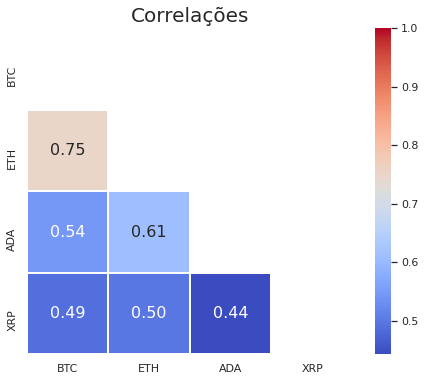

In [59]:
aux.plot_heat_sns(ret_criptos_fut, size=(8, 6))

- Retornos

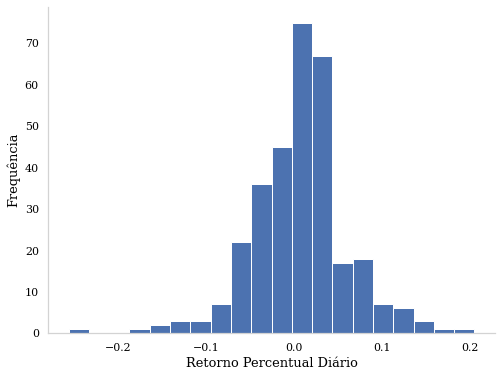

In [87]:
pesos_iguais = np.repeat(1/criptos_fut.shape[1], criptos_fut.shape[1])

# retornos
rets_criptos_fut = (aux.returns(criptos_fut) * pesos_iguais).sum(axis=1).to_frame()
rets_criptos_fut.rename(columns={0: 'Retornos'}, inplace=True)

rets_criptos_fut['Retornos'].plot(kind='hist', bins=20, figsize=(8, 6));
plt.xlabel('Retorno Percentual Diário', fontdict={'size': 13});
plt.ylabel('Frequência', fontdict={'size': 13});

In [88]:
vars_fut = aux.value_risk(rets_criptos_fut)
c_vars_fut = aux.c_value_risk(rets_criptos_fut, vars_fut)

for i, j in zip(vars_fut.keys(), c_vars_fut.keys()):
    print(
        f'{i} / {j}: {vars_fut[i]} / {c_vars_fut[j]}'
    )

var_95 / c_var_95: -0.07317693041827263 / -0.12102056743006988
var_97 / c_var_97: -0.09632905504578418 / -0.14264137187193507
var_99 / c_var_99: -0.1468397306979873 / -0.18337848915811455
var_99_9 / c_var_99_9: -0.22783456672191155 / -0.2560439725387422


In [89]:
cov_criptos_fut = aux.returns(criptos_fut).cov()

vol_criptos_fut_a = aux.vol(pesos_iguais, cov_criptos_fut, True)

downside_fut = rets_criptos_fut[rets_criptos_fut['Retornos'] < 0].std()

skew_fut = skew(rets_criptos_fut)
curtose_fut = kurtosis(rets_criptos_fut) - 3

print(
    f'Volatilidade anualizada da carteira passado: {round(vol_criptos_fut_a * 100, 4)} %\n'
    f'Downside risk: {round(downside_fut[0], 4)}\n'
    f'Skewness: {round(skew_fut[0], 4)}\n'
    f'Ex. Curtose: {round(curtose_fut[0], 4)}'
)

Volatilidade anualizada da carteira passado: 85.8101 %
Downside risk: 0.0389
Skewness: -0.2879
Ex. Curtose: -0.4064


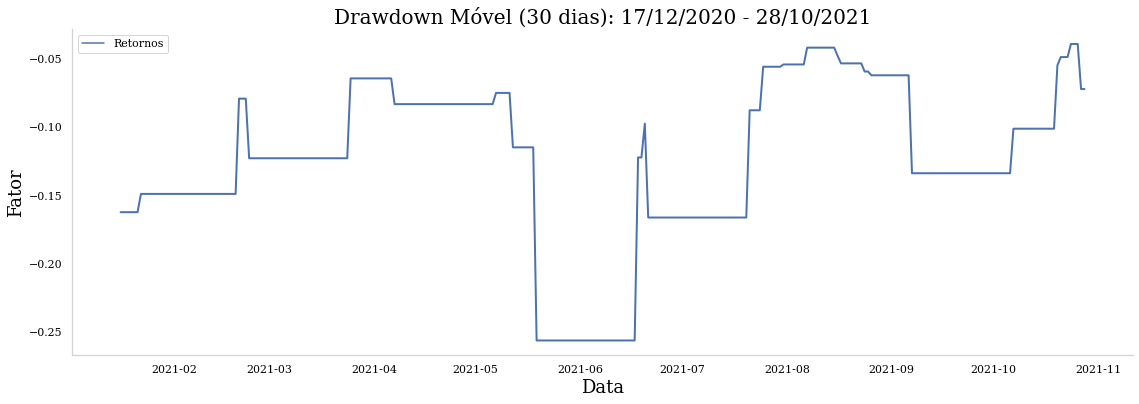

In [90]:
rol_drawdown_fut = rets_criptos_fut.rolling(window=30).min()

titles = [
    f'Drawdown Móvel (30 dias): {start_fut} - {end_fut}',
    'Data',
    'Fator'
]

aux.plot_lines_sns(rol_drawdown_fut, titles)

In [91]:
shapiro_fut = shapiro(rets_criptos_fut)

if shapiro_fut[1] < .05:
    print('Hipótese nula rejeitada: a distribuição não é normal.')
else:
    print('Hipótese nula aceita: a distribuição é normal.')

Hipótese nula rejeitada: a distribuição não é normal.
